In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as skl

from sklearn import neighbors, linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from IPython.display import display as dsp

print(sns.__version__)
print(mpl.__version__)
print(skl.__version__)

0.8.0
3.0.2
0.18.1


__Attribute Information:__

1. Sample code number: id number (ID)
2. Clump Thickness: 1 - 10 (ct)
3. Uniformity of Cell Size: 1 - 10 (csu)
4. Uniformity of Cell Shape: 1 - 10 (cshu)
5. Marginal Adhesion: 1 - 10 (ma)
6. Single Epithelial Cell Size: 1 - 10 (secs)
7. Bare Nuclei: 1 - 10 (bn)
8. Bland Chromatin: 1 - 10 (bc)
9. Normal Nucleoli: 1 - 10 (nn)
10. Mitoses: 1 - 10 (mito)
11. Class: (2 for benign, 4 for malignant) (class)

In [11]:
breast = pd.read_csv('data/breast-cancer-wisconsin.data.txt')

breast.columns = range(len(breast.columns))
breast.rename(columns = {0 : 'ID', 1 : 'ct', 2 : 'csu', 3 : 'cshu', 
                        4 : 'ma', 5 : 'secs', 6 : 'bn', 7 : 'bc',
                        8 : 'nn', 9 : 'mito', 10 : 'class'}, inplace = True)

breast.replace('?', np.nan, inplace = True)
breast.dropna(inplace = True)

breast.drop(['ID'], axis = 1, inplace = True)

#reset index
breast.index = range(len(breast))

breast = breast.apply(pd.to_numeric)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [5]:
def jitter_matrix(df, column_array):
    jit = pd.DataFrame(
        np.random.uniform(-.3, .3, size=(df.shape)),
        columns=column_array)
    return jit
    
def model_validation(mod, X, Y, holdout, folds):
    print('R-Square: ', mod.score(X,Y))
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = holdout, random_state = 101)
    print('\n{}% holdout:\n {}'.format(100 * holdout, mod.fit(X_train, Y_train).score(X_test, Y_test)))
    
    print('\n{} folds:\n {}'.format(folds, cross_val_score(mod, X, Y, cv = folds)))

In [6]:
print('Total benign: {}'.format(breast.loc[breast['class'] == 2].ct.count()))
print('Total malignent: {}'.format(breast.loc[breast['class'] == 4].ct.count()))

#breast.add(jitter_matrix(breast, breast.columns))

Total benign: 457
Total malignent: 241


In [7]:
#knn = neighbors.KNeighborsRegressor(n_neighbors = 10)
#brplot = breast[['ct','csu','cshu','ma', 'class']]

#g = sns.PairGrid(brplot, diag_sharey = False)
#g.map_upper(plt.scatter, alpha = 5)
#g.map_lower(sns.regplot, scatter_kws=dict(alpha = 0))
#g.map_diag(sns.kdeplot, lw = 3)

#plt.show()

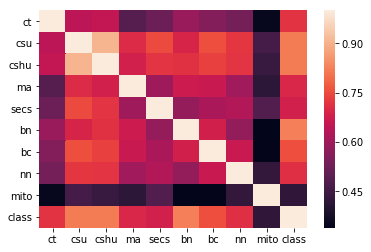

,ct,csu,cshu,ma,secs,bn,bc,nn,mito
0,5,4,4,5,7,10.0,3,2,1
1,3,1,1,1,2,2.0,3,1,1
2,6,8,8,1,3,4.0,3,7,1
3,4,1,1,3,2,1.0,3,1,1
4,8,10,10,8,7,10.0,9,7,1


0    2
1    2
2    2
3    2
4    4
Name: class, dtype: int64

In [8]:
y_ben = breast.loc[breast['class'] == 2]
y_mal = breast.loc[breast['class'] == 4]

sns.heatmap(breast.corr())
plt.show()

In [20]:
X = breast[['ct','csu','cshu','ma','secs', 'bn', 'bc', 'nn', 'mito']]
Y = breast['class']

knn = neighbors.KNeighborsRegressor(n_neighbors = 1)
knn.fit(X,Y)

regr = linear_model.LinearRegression()
regr.fit(X,Y)

score = cross_val_score(knn, X, Y)
print("KNN R^2: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

print('\nMultivar Lin Regression:',regr.score(X,Y))

print('\nLinear Regression Coefficients:\n', regr.coef_)


KNN R^2: 0.83 (+/- 0.18)

Multivar Lin Regression: 0.843264055823808

Linear Regression Coefficients:
 [0.06356589 0.04362707 0.03119778 0.01646283 0.02015008 0.09070277
 0.0384951  0.03701887 0.00195888]
